## Example of ML-Insights - Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

We construct two models (one with Gradient Boosting, one with Random Forest) to predict housing prices from features of the property such as overall square footage, lot size, condition of property, etc.

We then use the `ml_insights` model x-ray and related functionality to gain some insight on the models, what features are important, how the model predictions are affected by each feature, and why a particular house had a certain price.


In [1]:
# "pip install ml_insights" in terminal if needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_insights as mli


# To Plot matplotlib figures inline on the notebook
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
datafile = "data/Ames_Housing_Data.tsv"

In [3]:
df=pd.read_csv(datafile, sep='\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [5]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area']<=4000,:]
df.shape

(2925, 82)

In [6]:
# Choose a small subset of variables

X=df.loc[:,['Lot Area','Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add',
        'Gr Liv Area', 
        'Full Bath', 'Bedroom AbvGr',
        'Fireplaces', 'Garage Cars']]

y=df['SalePrice']

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2924 non-null float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


In [8]:
# There appears to be one NA in Garage Cars - fill with 0
X = X.fillna(0)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
Lot Area          2925 non-null int64
Overall Qual      2925 non-null int64
Overall Cond      2925 non-null int64
Year Built        2925 non-null int64
Year Remod/Add    2925 non-null int64
Gr Liv Area       2925 non-null int64
Full Bath         2925 non-null int64
Bedroom AbvGr     2925 non-null int64
Fireplaces        2925 non-null int64
Garage Cars       2925 non-null float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


In [10]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [11]:
# Train a Gradient Boosting Model

gbmodel1 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .005,
                                    max_depth = 4)
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.005,
             loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [12]:
#Compute the RMSE on the test set

test_res_gb = gbmodel1.predict(X_test)
np.sqrt(np.sum((test_res_gb - y_test)**2)/len(y_test))

25212.996332256422

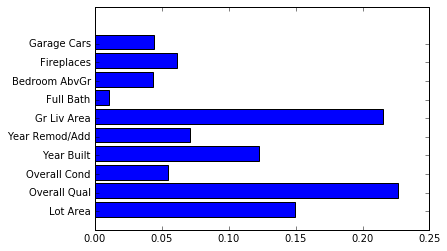

In [13]:
# Plot the "feature importances" given by the gb model - not super useful

fig, ax = plt.subplots()

ind = np.array(range(len(X.columns)))+.7
plt.barh(ind,gbmodel1.feature_importances_);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns));

In [14]:
mxr = mli.ModelXRay(gbmodel1,X_test)

Choose a random sample of 7 points and plot the "Individual Conditional Expectation" (ICE-plots)

Save the randomly selected points to use later for comparison

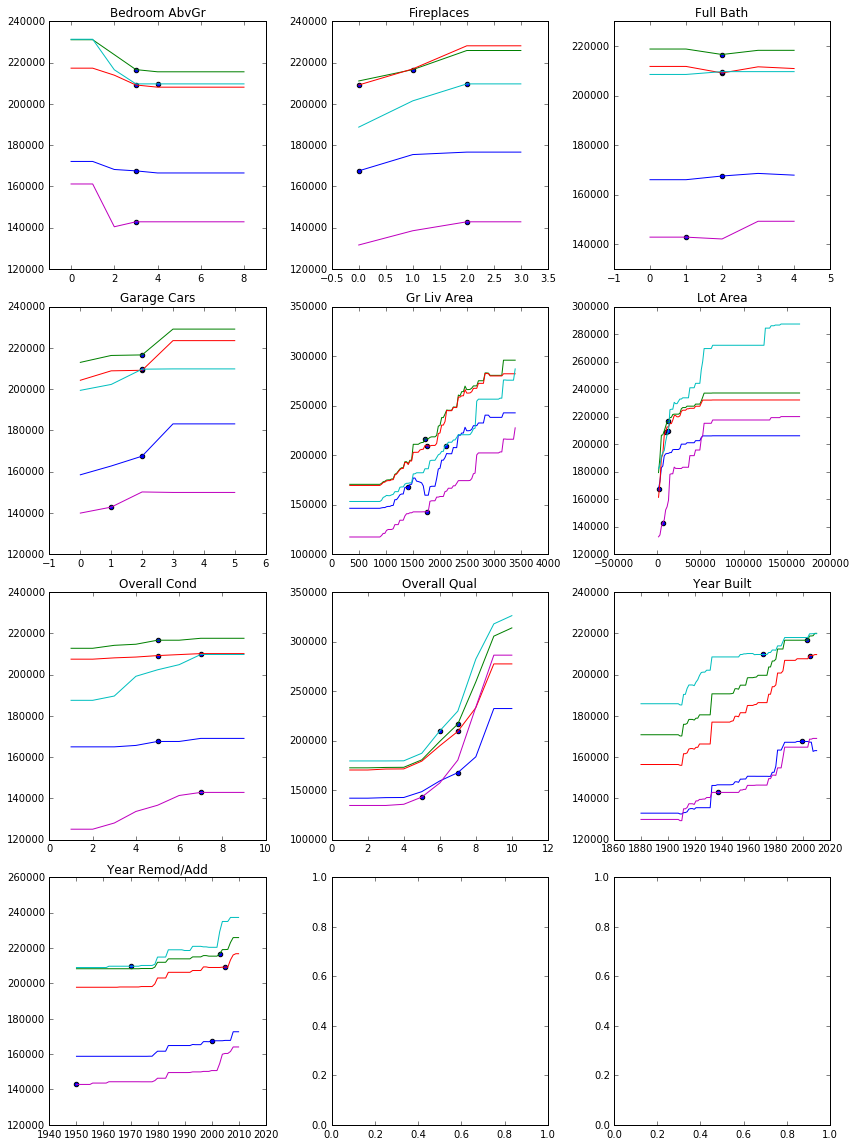

In [15]:
indices = mxr.feature_dependence_plots(num_pts=5)

In [16]:
indices

array([763, 649, 386, 284, 363])

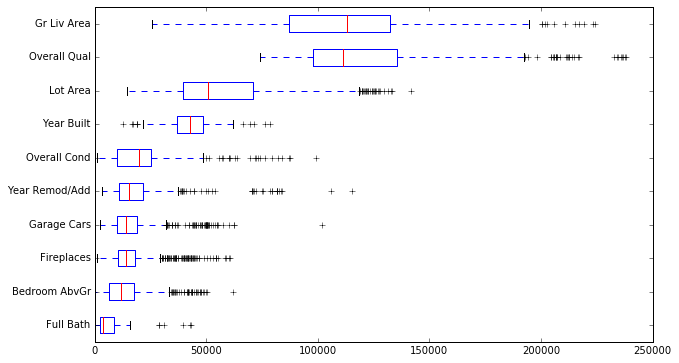

In [17]:
mxr.feature_effect_summary()

In [18]:
diff_path_obj = mxr.explain_prediction_difference(193,300, tol=.05)

Your initial point has a target value of 277564.7027
Your final point has a target value of 122014.3857
Changing Overall Qual from 8.0 to 6.0
		changes your target by -71615.9773 to 205948.7254
----------
Changing Year Built from 2002.0 to 1914.0
		changes your target by -34047.5502 to 171901.1752
----------
Changing Gr Liv Area from 1786.0 to 1355.0
		changes your target by -22287.4459 to 149613.7293
----------
Changing Garage Cars from 3.0 to 0.0
		changes your target by -16848.8893 to 132764.84
----------
Changing Overall Cond from 5.0 to 7.0
		changes your target by 11597.1833 to 144362.0233
----------
Changing Lot Area from 14860.0 to 6882.0
		changes your target by -16290.4091 to 128071.6142
----------
Tolerance of 0.05 reached
Current value of 128071.6142 is within 5.0% of 122014.3857


In [19]:
diff_path_obj

(['Overall Qual',
  'Year Built',
  'Gr Liv Area',
  'Garage Cars',
  'Overall Cond',
  'Lot Area'],
 [(8.0, 6.0),
  (2002.0, 1914.0),
  (1786.0, 1355.0),
  (3.0, 0.0),
  (5.0, 7.0),
  (14860.0, 6882.0)],
 [-71615.977277524857,
  -34047.550243482925,
  -22287.445901577594,
  -16848.889276273287,
  11597.183315283473,
  -16290.409132275658],
 [277564.70272092329,
  205948.72544339843,
  171901.17519991551,
  149613.72929833792,
  132764.84002206463,
  144362.0233373481,
  128071.61420507244])

In [20]:
rfmodel1 = RandomForestRegressor(n_estimators = 500)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [21]:
mxr_rf = mli.ModelXRay(rfmodel1,X_test)

Note below that the RF model is not very monotonic in the `Gr Liv Area` variable, in contrast to the GB Model.

array([763, 649, 386, 284, 363])

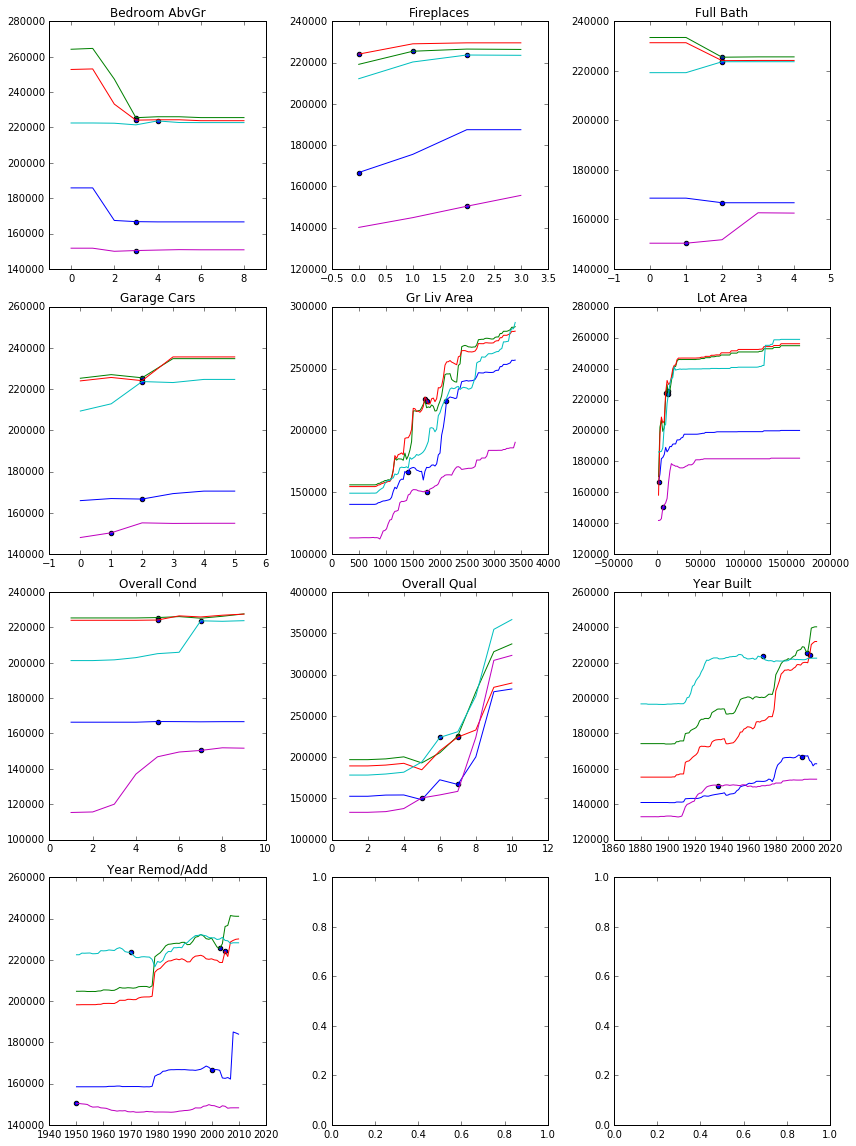

In [22]:
mxr_rf.feature_dependence_plots(pts_selected=indices)

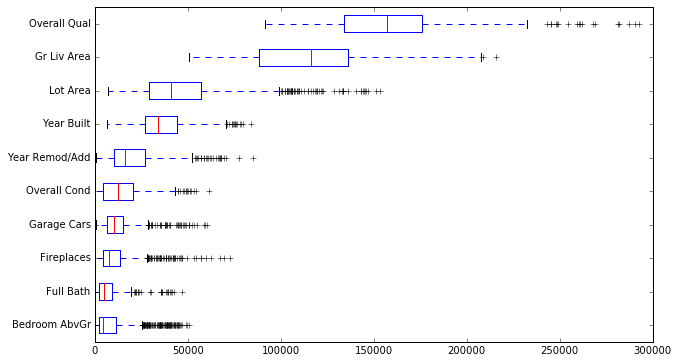

In [23]:
mxr_rf.feature_effect_summary()

In [24]:
mxr_rf.explain_prediction_difference(193,300, tol=.05)

Your initial point has a target value of 288740.274
Your final point has a target value of 115762.9
Changing Overall Qual from 8.0 to 6.0
		changes your target by -72743.736 to 215996.538
----------
Changing Gr Liv Area from 1786.0 to 1355.0
		changes your target by -31350.622 to 184645.916
----------
Changing Year Built from 2002.0 to 1914.0
		changes your target by -32160.414 to 152485.502
----------
Changing Lot Area from 14860.0 to 6882.0
		changes your target by -12243.98 to 140241.522
----------
Changing Garage Cars from 3.0 to 0.0
		changes your target by -18502.654 to 121738.868
----------
Changing Fireplaces from 1.0 to 0.0
		changes your target by -5443.718 to 116295.15
----------
Tolerance of 0.05 reached
Current value of 116295.15 is within 5.0% of 115762.9


(['Overall Qual',
  'Gr Liv Area',
  'Year Built',
  'Lot Area',
  'Garage Cars',
  'Fireplaces'],
 [(8.0, 6.0),
  (1786.0, 1355.0),
  (2002.0, 1914.0),
  (14860.0, 6882.0),
  (3.0, 0.0),
  (1.0, 0.0)],
 [-72743.735999999975,
  -31350.622000000003,
  -32160.41399999999,
  -12243.98000000001,
  -18502.653999999995,
  -5443.718000000008],
 [288740.27399999998,
  215996.538,
  184645.916,
  152485.50200000001,
  140241.522,
  121738.868,
  116295.14999999999])

In [25]:
#Compute the RMSE

test_res_rf = rfmodel1.predict(X_test)
np.sqrt(np.sum((test_res_rf - y_test)**2)/len(y_test))

25895.602379832279

Note that the RMSE is lower with the gbmodel than the rfmodel